In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud.shape

(600, 6)

In [9]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [12]:
fraud.isna()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [13]:
#Preprocessing the data
label_encoder = preprocessing.LabelEncoder()

In [14]:
fraud["Undergrad"]=label_encoder.fit_transform(fraud["Undergrad"])

In [15]:
fraud["Marital.Status"]=label_encoder.fit_transform(fraud["Marital.Status"])

In [16]:
fraud["Urban"]=label_encoder.fit_transform(fraud["Urban"])
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [20]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [21]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [22]:
fraud["TaxInc"].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

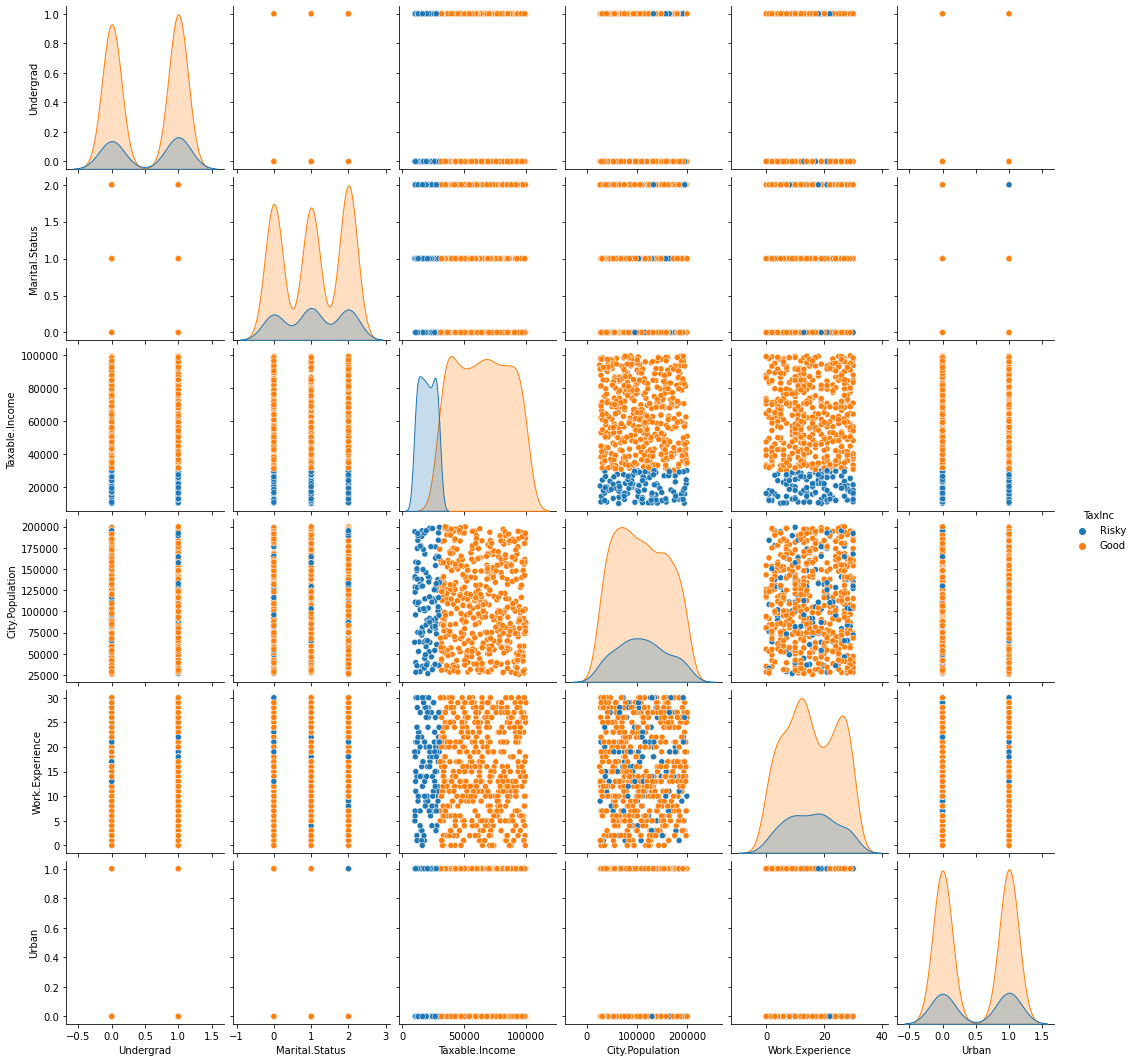

In [26]:
sns.pairplot(fraud,hue="TaxInc")

In [33]:
x=fraud.iloc[:,[0,1,3,4,5]]
y=fraud.iloc[:,-1]

In [35]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [36]:
fraud.TaxInc.value_counts()

Good     476
Risky    124
Name: TaxInc, dtype: int64

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
fraud_norm = scaler.fit_transform(x)

In [40]:
# splitting data into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

# Building decision tree classifier using Entropy

In [41]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

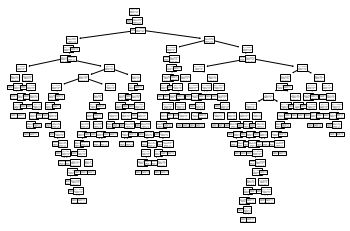

In [42]:
# plotting of decision tree
tree.plot_tree(model);

In [43]:
# Predicting On test data
preds = model.predict(x_test)

In [44]:
pd.Series(preds).value_counts()

Good     84
Risky    36
dtype: int64

In [45]:
preds

array(['Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 

In [46]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
TaxInc,,
Risky,17,11
Good,67,25


In [49]:
# accuracy
np.mean(preds==y_test)*100

65.0

# Building decision tree classifier using Gini criterion


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model_gini = DecisionTreeClassifier(criterion="gini")

In [55]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier()

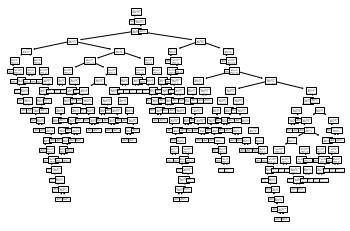

In [56]:
tree.plot_tree(model_gini);

# Prediction & Computing the Accuracy


In [66]:
pred1=model_gini.predict(x_test)

In [67]:
pd.Series(pred1).value_counts()

Good     90
Risky    30
dtype: int64

In [68]:
pred1

array(['Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'G

In [69]:
pd.crosstab(y_test,pred1)

col_0,Good,Risky
TaxInc,,
Risky,21,7
Good,69,23


In [70]:
np.mean(pred1==y_test)*100

63.33333333333333